In [45]:
import ROOT

In [149]:
def add_underflow_overflow(h):
    nbins = h.GetNbinsX()
    # add underflow to first bin
    h.SetBinContent(1,  h.GetBinContent(0) + h.GetBinContent(1))
    h.SetBinError(1,   (h.GetBinError(0)**2 + h.GetBinError(1)**2)**0.5)

    # add overflow to last bin
    h.SetBinContent(nbins, h.GetBinContent(nbins) + h.GetBinContent(nbins+1))
    h.SetBinError(nbins,  (h.GetBinError(nbins)**2 + h.GetBinError(nbins+1)**2)**0.5)

    return h

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file tr_cos_phi_lab.png has been created


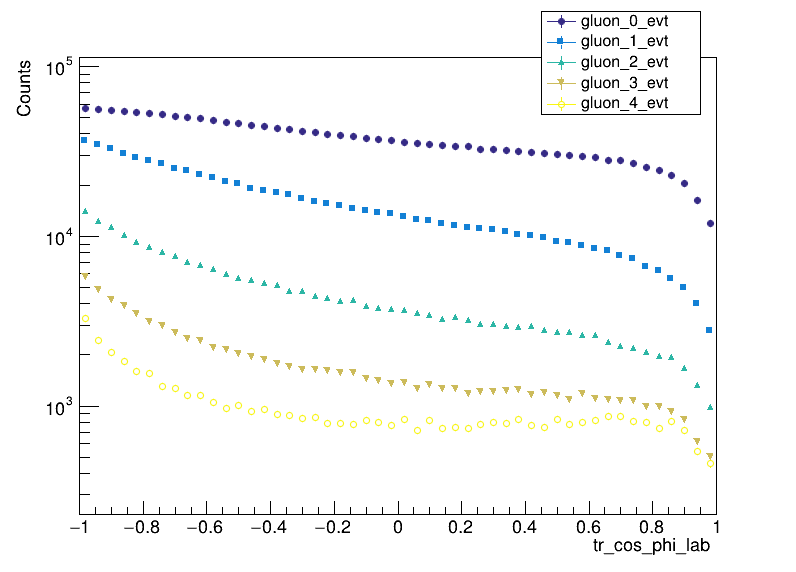

In [160]:
variable_to_plot = "tr_cos_phi_lab"



file = ROOT.TFile("/scratch-cbe/users/alikaan.gueven/Gollum/plots/test2/TT2lUnbinned_2016/TT2lUnbinned_2016.root", "READ")
canvas = ROOT.TCanvas("c", "c", 800, 600)
canvas.SetLogy(True)

# Legend coordinates: (x1,y1,x2,y2) in NDC (0–1 relative to pad)
legend = ROOT.TLegend(0.68, 0.8, 0.88, 0.98)

dirs = [k.GetName() for k in file.GetListOfKeys()][2:]
markers = [ROOT.kFullCircle, ROOT.kFullSquare, ROOT.kFullTriangleUp, ROOT.kFullTriangleDown, ROOT.kOpenCircle]
colors = [ROOT.kRed, ROOT.kBlue, ROOT.kGreen+2, ROOT.kMagenta, ROOT.kCyan+2]
hists = []
hists_clones = []
i = 0

for j in range(5):
    label = dirs[j]
    
    tdir = file.Get(label)
    h = tdir.Get(variable_to_plot)
    h = add_underflow_overflow(h)
    hists.append(h)
    # h = h.Rebin(4)
    h.SetMarkerStyle(markers[j]);
    h.SetMarkerSize(.8);
    h.SetMarkerColor(colors[j])
    h_clone = h.Clone()
    hists_clones.append(h_clone)
    if i == 0:
        h.Draw("EX0 PLC PMC")
        # h_clone.Draw("SAME HIST C")
    else:
        h.Draw("SAME EX0 PLC PMC")
        # h_clone.Draw("SAME HIST C")
    legend.AddEntry(h, label, "lep")
    i += 1

hists[0].SetMaximum(max([tmp.GetMaximum() for tmp in hists]) * 2)
hists[0].SetMinimum(max(min([tmp.GetMinimum() for tmp in hists]), 1) / 2)

legend.Draw()
canvas.Draw()
canvas.SaveAs(f"{variable_to_plot}.png")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


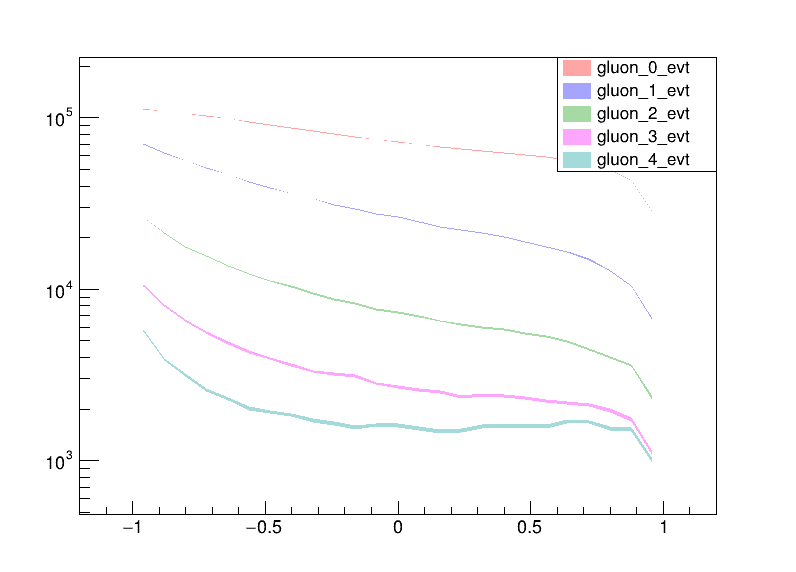

In [134]:
import ROOT

file = ROOT.TFile("/scratch-cbe/users/alikaan.gueven/Gollum/plots/test2/TT2lUnbinned_2016/TT2lUnbinned_2016.root", "READ")

canvas = ROOT.TCanvas("c", "c", 800, 600)
canvas.SetLogy(True)

legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)

dirs   = [k.GetName() for k in file.GetListOfKeys()][2:]
colors = [ROOT.kRed, ROOT.kBlue, ROOT.kGreen+2, ROOT.kMagenta, ROOT.kCyan+2]

gs = []  # list of TGraphErrors

for j in range(5):
    label = dirs[j]
    tdir  = file.Get(label)
    h     = tdir.Get("tr_cos_phi_lab")
    h     = h.Rebin(2)
    g     = ROOT.TGraphErrors(h)
    gs.append(g)

    g.SetFillColorAlpha(colors[j % len(colors)], 0.35)
    g.SetLineWidth(0)
    g.SetMarkerSize(0)

    if j == 0:
        g.Draw("A3")   # first one defines axes
    else:
        g.Draw("3 SAME")

    legend.AddEntry(g, label, "f")  # "f" = filled box

# --- compute global ymin / ymax across all graphs ---
ymax = 0
ymin = 1e9
for g in gs:
    for i in range(g.GetN()):
        y  = g.GetY()[i]
        ey = g.GetEY()[i]
        ymax = max(ymax, y + ey)
        if y - ey > 0:
            ymin = min(ymin, y - ey)

# protect ymin in log scale
if ymin <= 0: 
    ymin = 0.5

# adjust the axis histogram (from first graph)
ROOT.gPad.Update()
ax = gs[0].GetHistogram()
ax.SetMaximum(ymax * 2.0)
ax.SetMinimum(ymin / 2.0)

legend.Draw()
canvas.Modified()
canvas.Update()
canvas.Draw()
# canvas.SaveAs("bands.png")


In [38]:
for key in file.GetListOfKeys():
    print(key.GetName())

all_evt
gluon_evt
gluon20_evt
gluon40_evt
gluon60_evt
gluon80_evt
gluon100_evt


In [39]:
import array

In [40]:
tdir = file.Get("gluon_evt")
for key in tdir.GetListOfKeys():
    hist = key.ReadObj()
    if hist.GetName() == "x1_prod_x2":
        print(hist.GetName())
        probs=(0, 0.20, 0.40, 0.60, 0.80, 1.00)
        a_probs = array.array('d', probs)
        a_vals  = array.array('d', [0.0]*len(probs))
        hist.GetQuantiles(len(probs), a_vals, a_probs)   # x-values at given quantiles
        print(a_probs)
        print(a_vals)


x1_prod_x2
array('d', [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
array('d', [0.0002, 0.001939159325940502, 0.002720896073167732, 0.0038258764649042394, 0.006072145414146402, 0.1998])


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


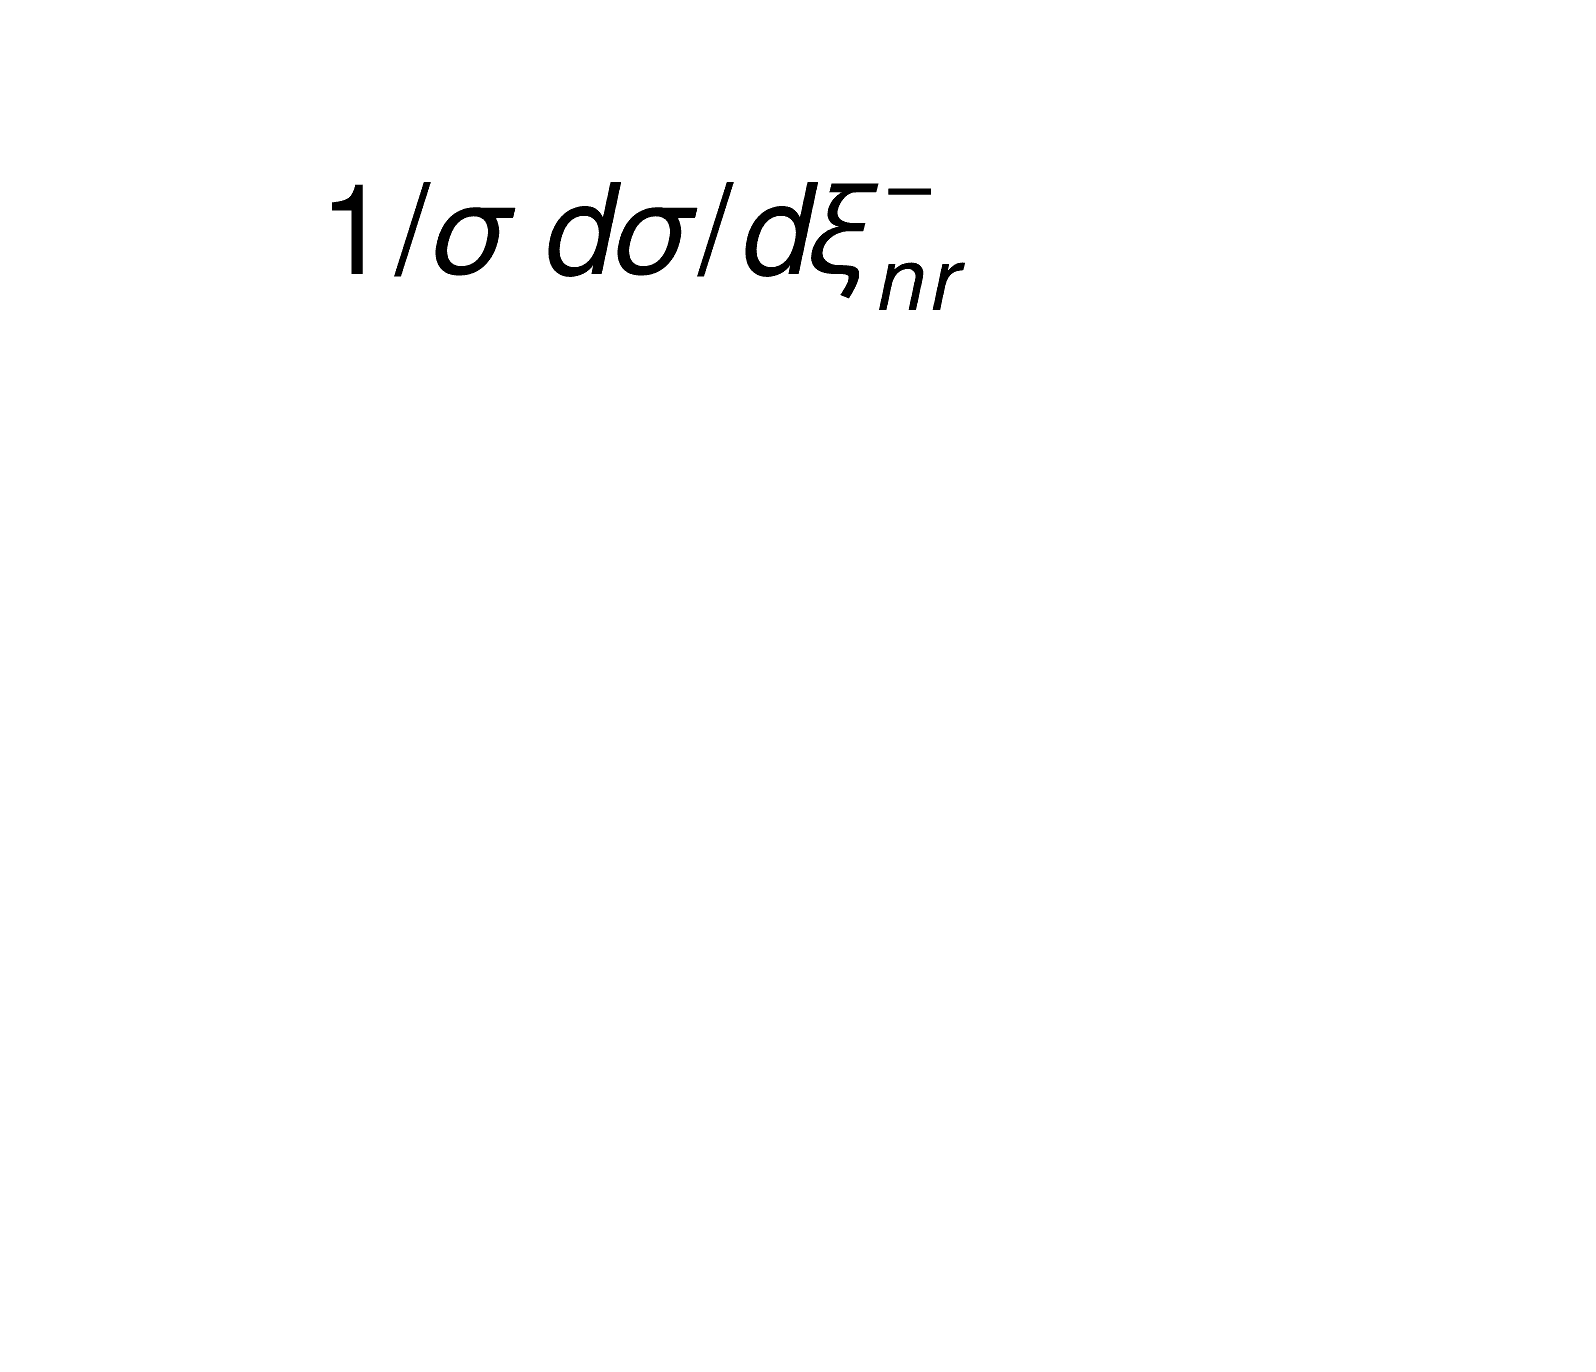

In [7]:
import ROOT
c = ROOT.TCanvas("c", "c", 1600, 1400)
latex = ROOT.TLatex()
latex.SetTextSize(0.10)

latex.DrawLatex(0.2, 0.8, r"1/\sigma \, d\sigma/d \xi_{nr}^{-}")
# latex.DrawLatex(0.2, 0.8, "#xi_{n*k}^{*}")
c.Update()
c.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


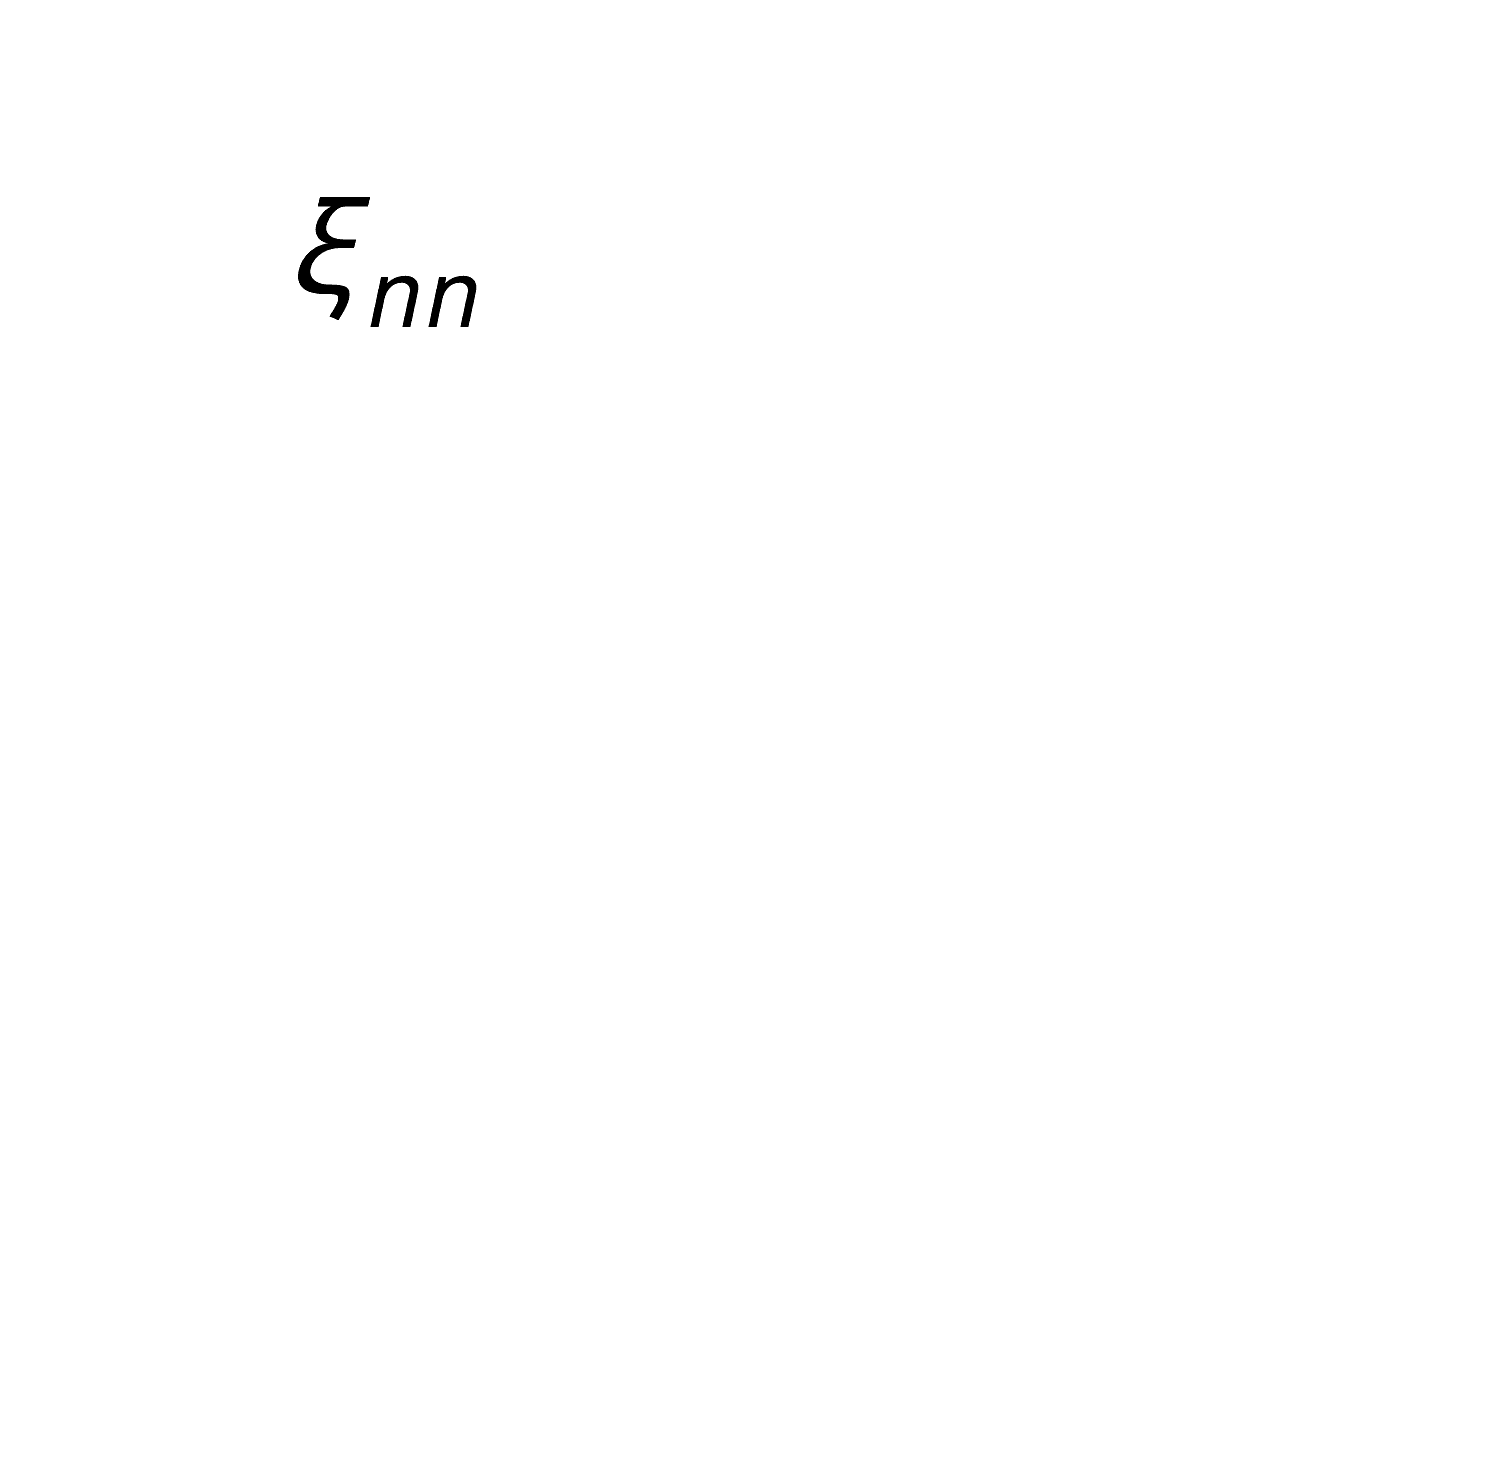

In [19]:
import ROOT
c = ROOT.TCanvas("c", "c", 1500, 1500)
latex = ROOT.TLatex()
latex.SetTextSize(0.10)

latex.DrawLatex(0.2, 0.8, "\\xi_{nn}")
# latex.DrawLatex(0.2, 0.8, r"\mathit{m^{\small{W^{+}}}}")

c.Update()
c.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


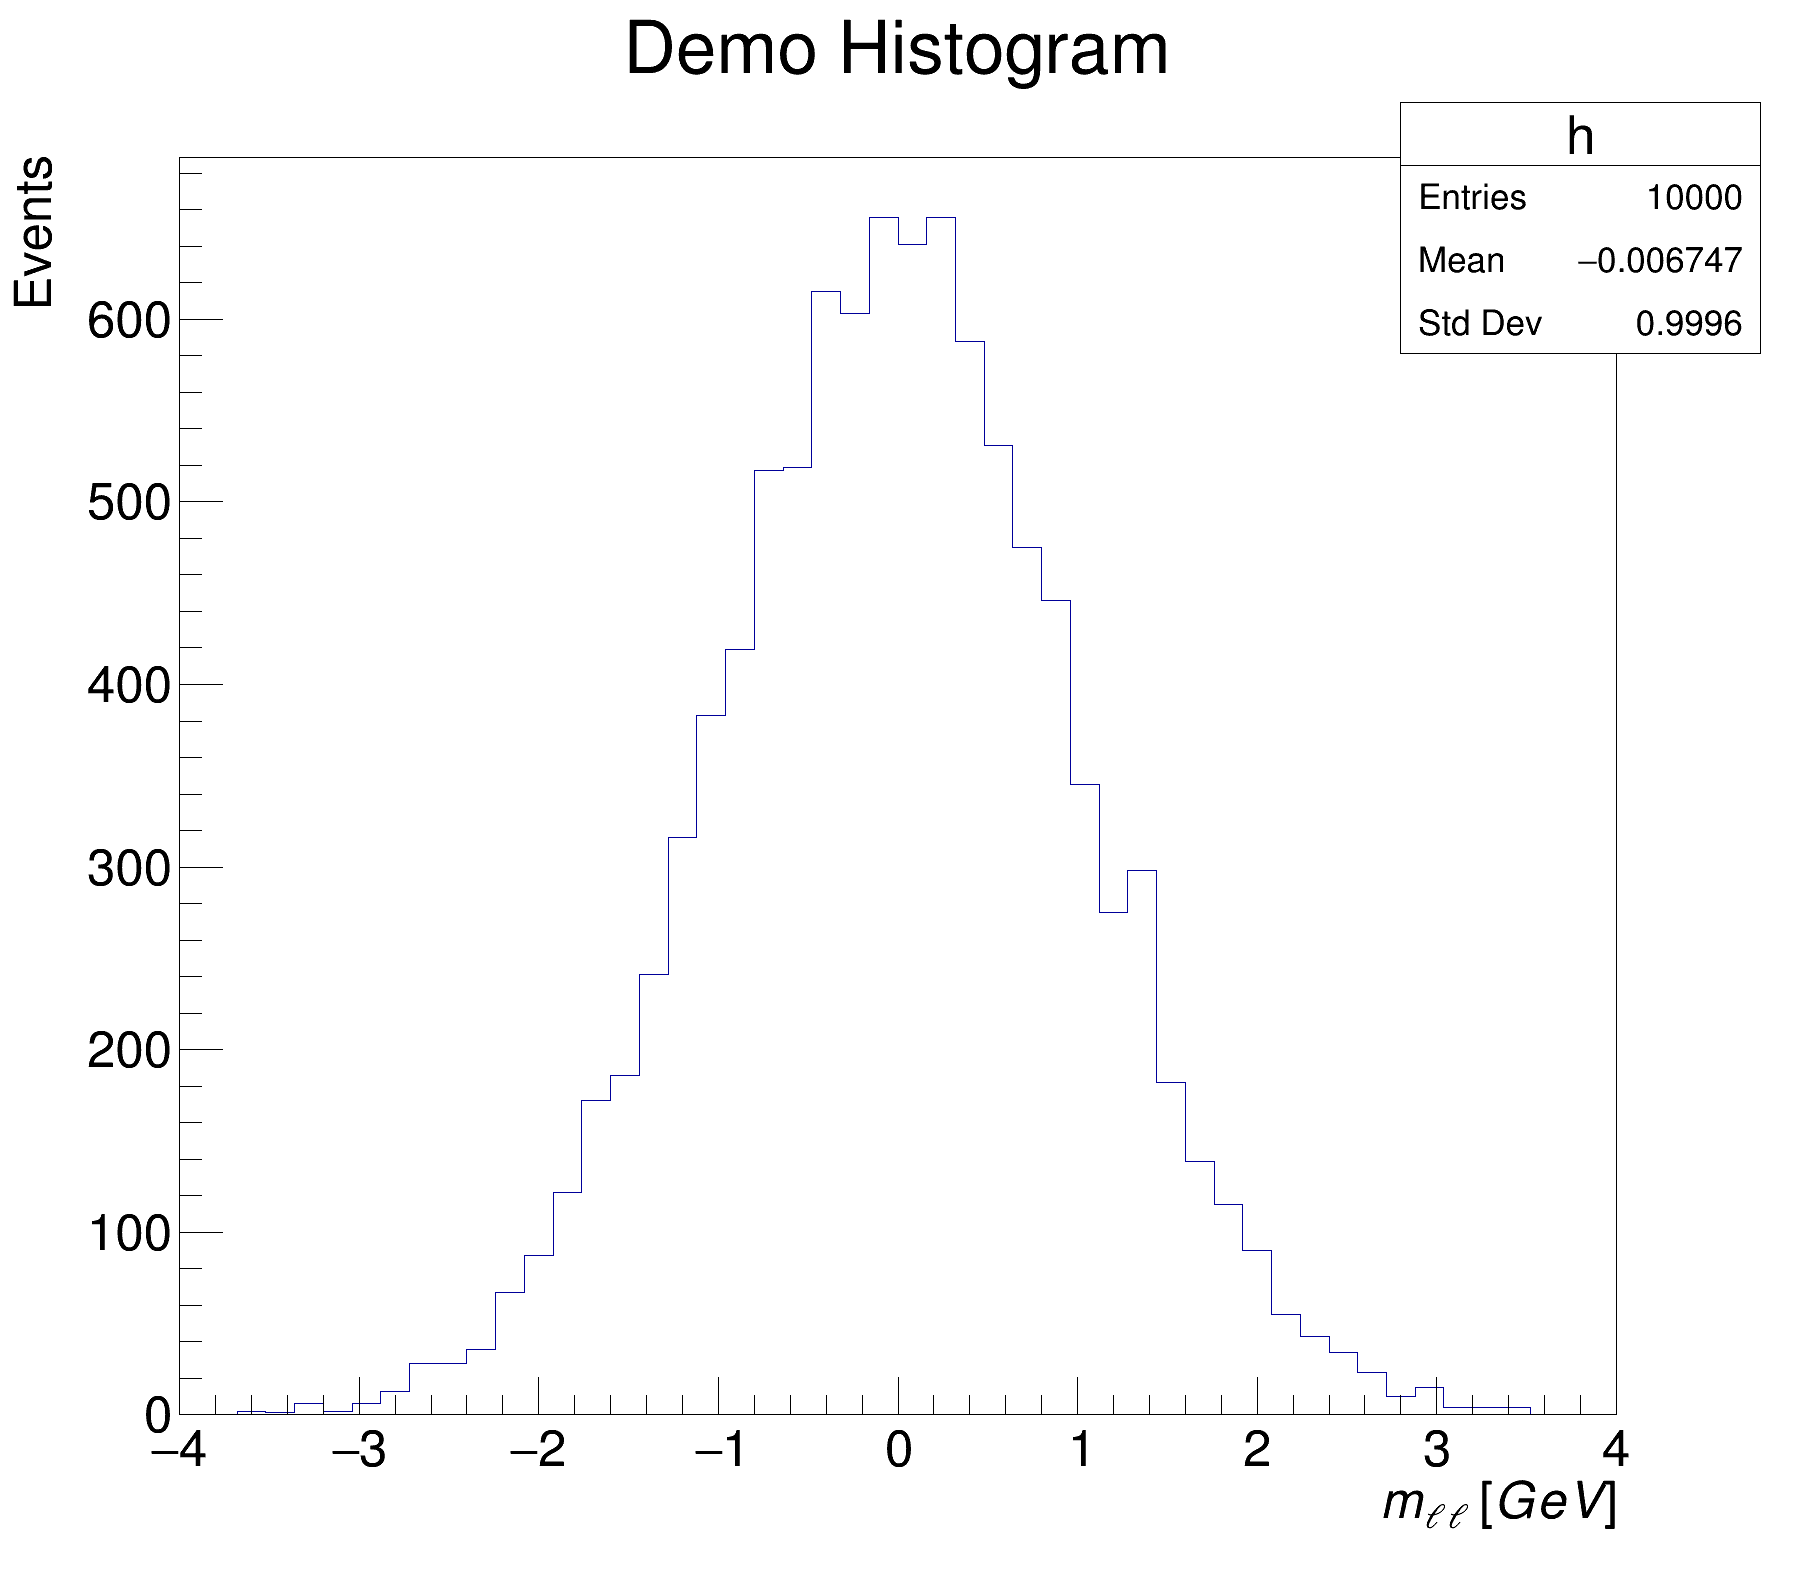

In [101]:
import ROOT

# Create a canvas
c = ROOT.TCanvas("c", "Example", 1800, 1600)

# Make a histogram
h = ROOT.TH1F("h", "Demo Histogram", 50, -4, 4)

# Fill with Gaussian random numbers
for i in range(10000):
    h.Fill(ROOT.gRandom.Gaus())

# Set axis titles
h.GetXaxis().SetTitle("m_{\ell\ell} \, [GeV]")  # TLatex style
h.GetYaxis().SetTitle("Events")

# Draw
h.Draw()

c.Update()
c.Draw()

In [1]:
import ROOT

Welcome to JupyROOT 6.28/00


In [32]:
file = "/scratch-cbe/users/alikaan.gueven/Gollum/plots/test3/TT2lUnbinned_2016/TT2lUnbinned_2016.root"

tfile = ROOT.TFile(file, "READ")
tdir_names = [k.GetName() for k in tfile.GetListOfKeys()]
tdir_names = tdir_names[1:]

tdirs = [tfile.Get(tdir_name) for tdir_name in tdir_names]
hist_names = [key.GetName() for key in tdirs[0].GetListOfKeys()]



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


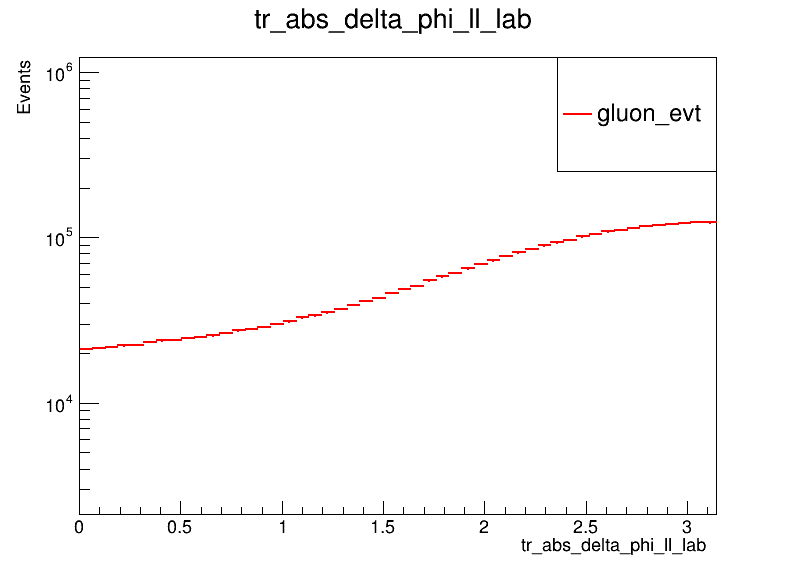

In [37]:
hist_name = "tr_abs_delta_phi_ll_lab"

hist0 = tdirs[0].Get(hist_name)
h = hist0.Clone()


canvas = ROOT.TCanvas("c", "c", 800, 600)
canvas.SetLogy(True)
legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)

h.Draw()
legend.AddEntry(h, tdir_names[0], "l")
h.SetLineColor(ROOT.kRed)
h.SetLineWidth(2)
h.SetFillColorAlpha(ROOT.kRed, 0.35)
h.SetFillStyle(3001)
h.SetMarkerSize(0)
h.SetMarkerStyle(0)
h.SetMarkerColor(ROOT.kRed)
h.SetTitle(hist_name)
h.GetXaxis().SetTitle(hist_name)
h.GetYaxis().SetTitle("Events")
h.SetMinimum(h.GetMinimum() / 1e1)
h.SetMaximum(h.GetMaximum() * 1e1)
legend.Draw()
canvas.Draw()
canvas.Update()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


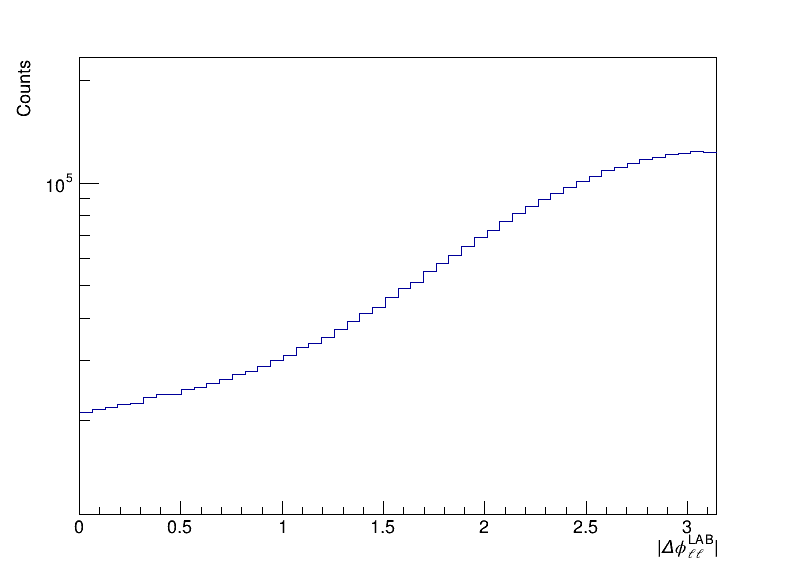

In [41]:
import math, ROOT

h = hist0.Clone()
ROOT.TH1.SetDefaultSumw2(True)  # keep proper errors

# add underflow to first visible bin
b1 = h.GetBinContent(1); e1 = h.GetBinError(1)
uf = h.GetBinContent(0); eu = h.GetBinError(0)
h.SetBinContent(1, b1 + uf)
h.SetBinError(1, math.hypot(e1, eu))

# add overflow to last visible bin
nb = h.GetNbinsX()
bl = h.GetBinContent(nb); el = h.GetBinError(nb)
of = h.GetBinContent(nb+1); eo = h.GetBinError(nb+1)
h.SetBinContent(nb, bl + of)
h.SetBinError(nb, math.hypot(el, eo))

canvas = ROOT.TCanvas("c", "c", 800, 600)
h.Draw("HIST")
canvas.SetLogy(True)
canvas.Draw()


Warning in <TFile::Append>: Replacing existing TH1: h_with_uf_of (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


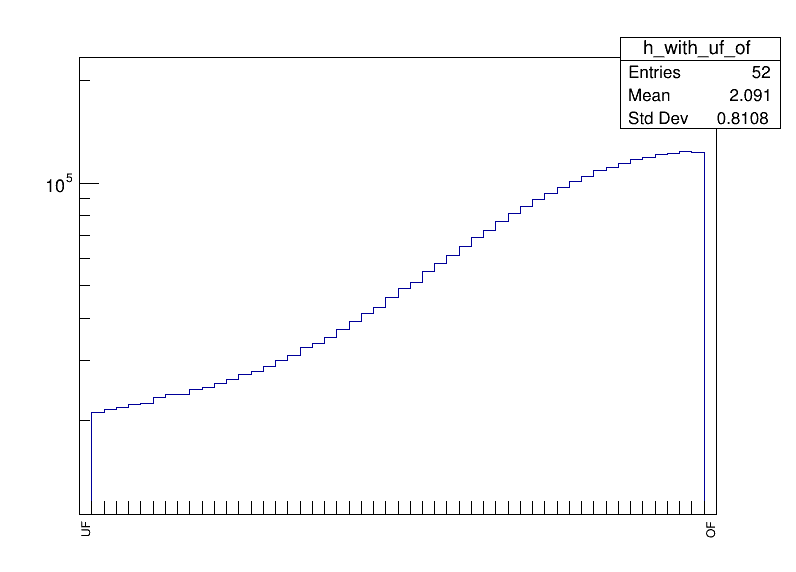

In [43]:
from array import array
import ROOT

src = hist0.Clone()
nb = src.GetNbinsX()
xmin = src.GetXaxis().GetXmin()
xmax = src.GetXaxis().GetXmax()
w = (xmax - xmin) / nb

# build a histogram with 2 extra bins (one before xmin, one after xmax)
edges = [xmin - w] + [xmin + i*w for i in range(nb+1)] + [xmax + w]
h = ROOT.TH1F("h_with_uf_of", src.GetTitle(), nb+2, array('d', edges))
ROOT.TH1.SetDefaultSumw2(True)

# move contents (and errors)
h.SetBinContent(1,     src.GetBinContent(0))        # UF
h.SetBinError(1,       src.GetBinError(0))
for i in range(1, nb+1):
    h.SetBinContent(i+1, src.GetBinContent(i))
    h.SetBinError(i+1,   src.GetBinError(i))
h.SetBinContent(nb+2,  src.GetBinContent(nb+1))     # OF
h.SetBinError(nb+2,    src.GetBinError(nb+1))

# label the extra bins
ax = h.GetXaxis()
ax.SetBinLabel(1, "UF")
ax.SetBinLabel(nb+2, "OF")
ax.LabelsOption("v")  # vertical labels (optional)

canvas = ROOT.TCanvas("c", "c", 800, 600)
h.Draw("HIST")
canvas.SetLogy(True)
canvas.Draw()
